# **Taylor Series in Python**

**Code the Taylor Series by writing out each term individually**

In [ ]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


Comparison to math library

In [ ]:
print(math.exp(2))

7.38905609893065


**Use a for loop to calculate a Taylor Series**

In [ ]:
import math

x = 2
e_to_2 = 0
for i in range(5):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.0


In [ ]:
import math

x = 2
e_to_2 = 0
for i in range(10):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.3887125220458545


Comparison to math library

In [ ]:
print(math.exp(2))

7.38905609893065


**Refactor the for loop into a function**

In [ ]:
import math

def func_e_to_2(n):
    x = 2
    e_to_2 = 0
    for i in range(n):
        e_to_2 += x**i/math.factorial(i)
    
    return e_to_2

In [ ]:
out = func_e_to_2(10)
print(out)

7.3887125220458545


In [ ]:
import math

def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    
    return e_approx

In [ ]:
out = func_e(2,10)
print(out)

7.3887125220458545


In [ ]:
out = func_e(5,10)
print(out)

143.68945656966488


Comparison of e^5 to math library

In [ ]:
out = math.exp(5)
print(out)

148.4131591025766


**Use a for loop to calculate the difference between the Taylor Series expansion and Python's exp() function**

In [ ]:
import math

x = 5
for i in range(1,11):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 148.4131591025766, error = 147.4131591025766
2 terms: Taylor Series approx= 6.0, exp calc= 148.4131591025766, error = 142.4131591025766
3 terms: Taylor Series approx= 18.5, exp calc= 148.4131591025766, error = 129.9131591025766
4 terms: Taylor Series approx= 39.33333333333333, exp calc= 148.4131591025766, error = 109.07982576924327
5 terms: Taylor Series approx= 65.375, exp calc= 148.4131591025766, error = 83.0381591025766
6 terms: Taylor Series approx= 91.41666666666667, exp calc= 148.4131591025766, error = 56.99649243590993
7 terms: Taylor Series approx= 113.11805555555556, exp calc= 148.4131591025766, error = 35.29510354702104
8 terms: Taylor Series approx= 128.61904761904762, exp calc= 148.4131591025766, error = 19.79411148352898
9 terms: Taylor Series approx= 138.30716765873015, exp calc= 148.4131591025766, error = 10.105991443846449
10 terms: Taylor Series approx= 143.68945656966488, exp calc= 148.4131591025766, error = 4.723702532911

**Use a break statement to exit a for loop early.**

In [ ]:
import math

x = 5
for i in range(1,20):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    if e_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

12 terms: Taylor Series approx= 147.60384850489015, exp calc= 148.4131591025766, error = 0.8093105976864479


**Create a function to estimate the value of cos(x) using a Taylor Series**

In [ ]:
import math

def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

In [ ]:
angle_rad = (math.radians(45))
out = func_cos(angle_rad,5)
print(out)

0.7071068056832942


In [ ]:
out = math.cos(angle_rad)
print(out)

0.7071067811865476


**Build a plot to compare the Taylor Series approximation to Python's cos() function**

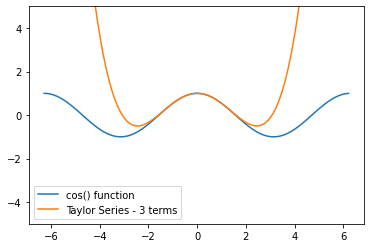

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)
t_cos = [func_cos(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-5,5])
ax.legend(['cos() function','Taylor Series - 3 terms'])

plt.show()

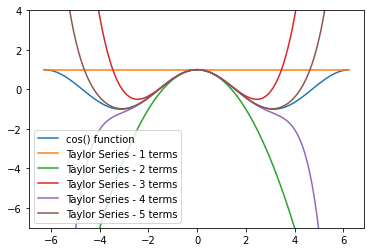

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

# **Taylor Series Expansion with Python**

In [23]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [24]:
# Define symbol
x = Symbol('x')

In [25]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [26]:
print('sin(x) =', taylor(sin(x), 0, 4))

print('cos(x) =', taylor(cos(x), 0, 4))

print('e(x) =', taylor(exp(x), 0, 4))

sin(x) = -x**3/6 + x
cos(x) = -x**2/2 + 1
e(x) = x**3/6 + x**2/2 + x + 1


In [27]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))

print('cos(1) =', taylor(cos(x), 0, 4).subs(x,1))

print('e(1) =', taylor(exp(x), 0, 4).subs(x,1))

sin(1) = 5/6
cos(1) = 1/2
e(1) = 8/3


Taylor Expansion for Sine

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


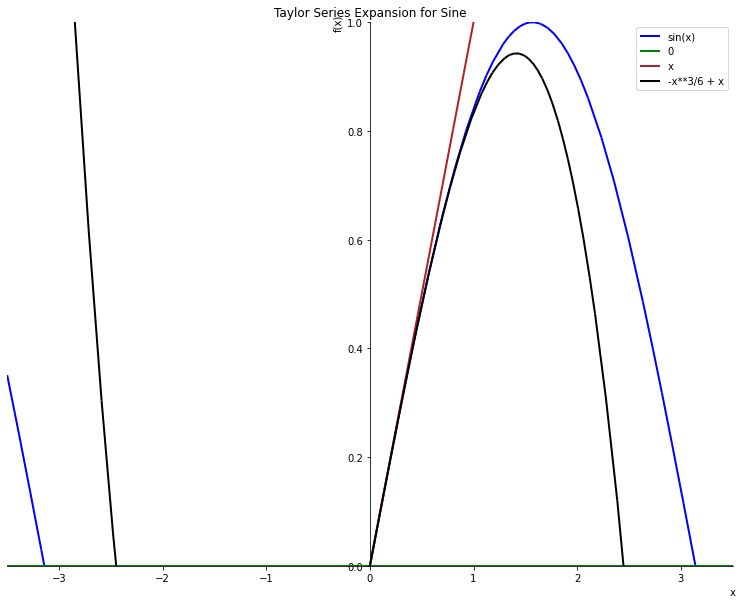

In [37]:
# This will plot sine and its Taylor approximations

p = plot(sin(x),taylor(sin(x),0,1),taylor(sin(x),0,3),taylor(sin(x),0,5),
         (x,-3.5,3.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Sine'
p.show()

Taylor Expansion for Cosine

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


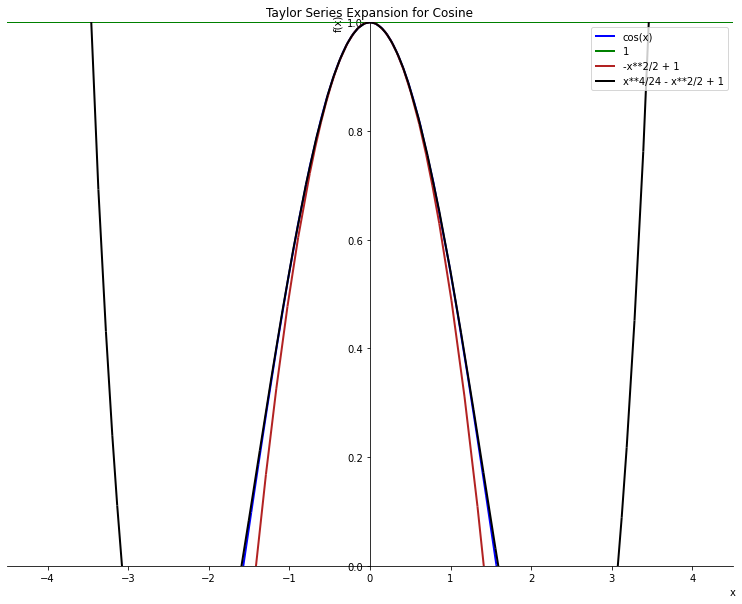

In [38]:
# This will plot cosine and its Taylor approximations

p = plot(cos(x),taylor(cos(x),0,2),taylor(cos(x),0,4),taylor(cos(x),0,6),
         (x,-4.5,4.5),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Cosine'
p.show()

Taylor Expansion for Exponent

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


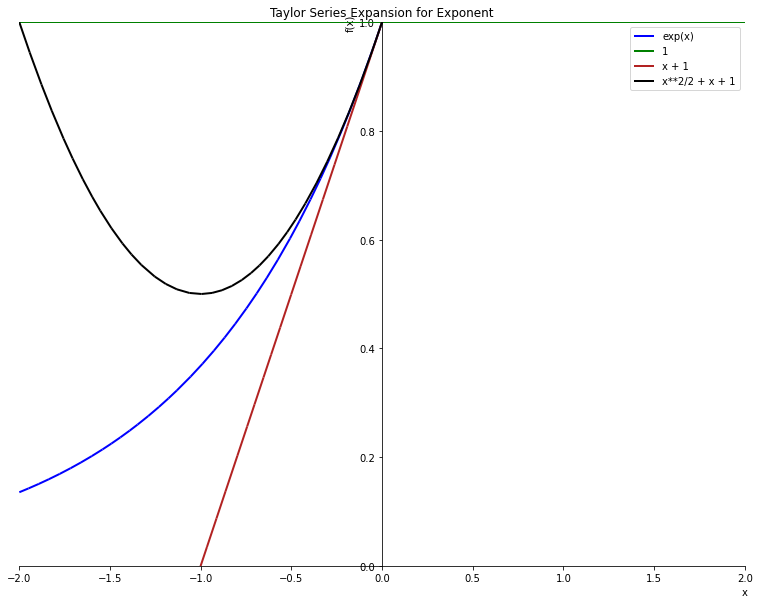

In [39]:
# This will plot exponent and its Taylor approximations

p = plot(exp(x),taylor(exp(x),0,1),taylor(exp(x),0,2),taylor(exp(x),0,3),
         (x,-2,2),legend=True, show=False)

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Exponent'
p.show()